<a href="https://colab.research.google.com/github/SaiMithunPunna/AIDS/blob/main/ANN_model(19_June_25).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from  sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.decomposition import PCA

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense , Dropout

In [ ]:
df=sns.load_dataset('diamonds')

<Axes: >

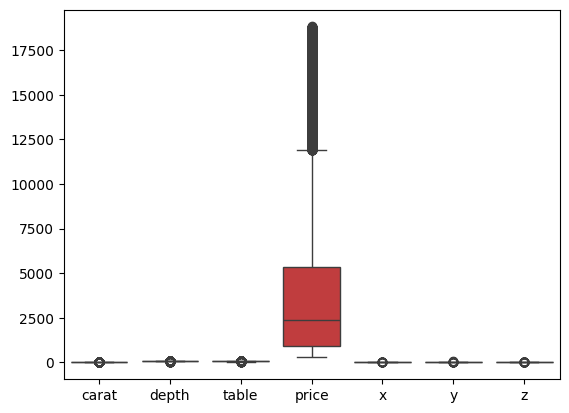

In [ ]:
sns.boxplot(df)

In [ ]:
Q1=df['carat'].quantile(0)
Q3=df['carat'].quantile(0.55)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['carat']>=lower_bound) & (df['carat']<=upper_bound)]


Q1=df['depth'].quantile(0.60)
Q3=df['depth'].quantile(0.81)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['depth']>=lower_bound) & (df['depth']<=upper_bound)]


Q1=df['table'].quantile(0.75)
Q3=df['table'].quantile(0.83)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['table']>=lower_bound) & (df['table']<=upper_bound)]


Q1=df['price'].quantile(0)
Q3=df['price'].quantile(0.46)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['price']>=lower_bound) & (df['price']<=upper_bound)]

In [ ]:
df.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
le=LabelEncoder()

In [ ]:
category_cols=df.select_dtypes(include='category').columns


In [ ]:
for col in category_cols:
  df[col]=le.fit_transform(df[col])

/tmp/ipython-input-9-3623715017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=le.fit_transform(df[col])
/tmp/ipython-input-9-3623715017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=le.fit_transform(df[col])
/tmp/ipython-input-9-3623715017.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [ ]:
# scaling_cols=['depth' , 'table' , 'price']
# sc=StandardScaler()

In [ ]:
# for col in scaling_cols:
#   df[[col]]=sc.fit_transform(df[[col]])

In [ ]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
6,0.24,4,5,6,62.3,57.0,336,3.95,3.98,2.47
19,0.30,4,6,2,62.7,59.0,351,4.21,4.27,2.66
26,0.24,3,5,4,62.5,57.0,355,3.97,3.94,2.47
27,0.30,4,6,5,62.2,57.0,357,4.28,4.30,2.67
34,0.23,4,0,4,61.9,58.0,402,3.92,3.96,2.44
45,0.29,3,2,2,62.4,58.0,403,4.24,4.26,2.65
48,0.25,4,1,5,63.3,60.0,404,4.00,4.03,2.54


In [ ]:
df['table'].mean()


np.float64(58.01665443873808)

In [ ]:
le=LabelEncoder()
cat_cols=df.select_dtypes(include='category').columns
for col in cat_cols:
  df[col]=le.fit_transform(df[col])
X=df.drop('cut' , axis=1)

In [ ]:
y=df['cut']

In [ ]:
y_encoded=le.fit_transform(y)

In [ ]:
y_categorical=to_categorical(y_encoded)

In [ ]:
y_categorical

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
y_encoded

array([3, 1, 4, ..., 4, 3, 4])

In [ ]:
X_train ,X_test , y_train , y_test=train_test_split(X , y_categorical , test_size=0.2 , random_state=42)

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
model=Sequential([

    Dense(128 , activation='relu' ,input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers.schedules import ExponentialDecay
lr_schedule=ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True
)

In [ ]:
from keras.optimizers import Adam
adam_ls=Adam(learning_rate=lr_schedule)

In [ ]:
model.compile(optimizer=adam_ls, loss='categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
history=model.fit(
  X_train_scaled , y_train ,
  validation_split=0.2 ,
  epochs=100 ,
  batch_size=64 ,
  verbose=1
)

Epoch 1/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5489 - loss: 1.0691 - val_accuracy: 0.6908 - val_loss: 0.8118
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6626 - loss: 0.8351 - val_accuracy: 0.6882 - val_loss: 0.7904
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6598 - loss: 0.8280 - val_accuracy: 0.6887 - val_loss: 0.7853
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6661 - loss: 0.8295 - val_accuracy: 0.7056 - val_loss: 0.7700
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6703 - loss: 0.8051 - val_accuracy: 0.6898 - val_loss: 0.7798
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6898 - loss: 0.7850 - val_accuracy: 0.6994 - val_loss: 0.7770
Epoch 7/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6785 - loss: 0.7941 - val_accuracy: 0.7040 - val_loss: 0.7434
Epoch 8/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6884 - loss: 0.7703 - val_acc

In [ ]:
model.evaluate(X_test_scaled , y_test)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7840 - loss: 0.5231


[0.534092128276825, 0.7766911387443542]

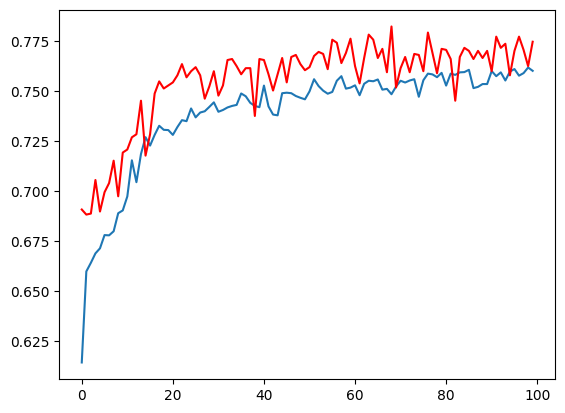

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'] , color='red')

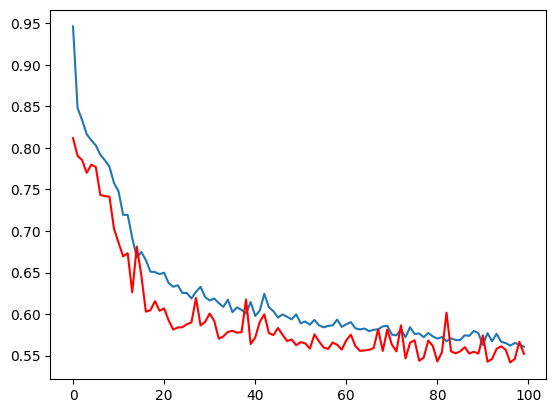

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'] , color='red')